<a href="https://colab.research.google.com/github/primawn/capstone-tetris/blob/main/capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [223]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px

In [222]:
!pip install streamlit
import streamlit as st

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **DATA**

### **Provinsi**

#### **JKT**

In [68]:
jkt_tb = pd.read_csv('TB_DKI_Jakarta.csv')


In [42]:
jkt_tb1 = jkt_tb.drop(labels=['Puskesmas', 'Penderita_Laki','Penderita_Perempuan'], axis=1)
jkt_tb1 = jkt_tb1.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','Total_Penderita':'Jumlah Penderita TB'})

In [67]:
jkt_dm = pd.read_csv('DM_DKI_Jakarta.csv')


In [44]:
jkt_dm1 = jkt_dm.drop(labels=['Puskesmas'], axis=1)
jkt_dm1 = jkt_dm1.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','Jumlah_Penderita_DM':'Jumlah Penderita DM'})

In [61]:
jkt_data = pd.merge(jkt_tb1,jkt_dm1)
jkt_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Jakarta Pusat,4660,28571
1,Jakarta Utara,2888,37294
2,Jakarta Barat,4223,43128
3,Jakarta Selatan,4770,63762
4,Jakarta Timur,7033,59906
5,Kepulauan Seribu,41,1257


**DIY**

In [46]:
diy_data = pd.read_csv('DI_Yogya.csv', sep=';')
diy_data = diy_data.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','TB':'Jumlah Penderita TB','DM':'Jumlah Penderita DM'})
diy_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Kulonprogo,502,12247
1,Bantul,402,34204
2,Gunungkidul,632,18200
3,Sleman,220,41193
4,Yogyakarta,718,21499


**BANTEN**

In [66]:
banten_dm = pd.read_csv('DM_Banten.csv', sep=',')
banten_dm = banten_dm.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','Jumlah_Penderita_DM':'Jumlah Penderita DM'})
banten_dm = banten_dm.drop(labels=['Puskesmas'], axis=1)


In [65]:
banten_tb = pd.read_csv('TB_Banten.csv', sep=',')
banten_tb = banten_tb.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','Total_Penderita':'Jumlah Penderita TB'})
banten_tb = banten_tb.drop(labels=['Puskesmas','Penderita_Laki','Penderita_Perempuan'], axis=1)


In [62]:
banten_data = pd.merge(banten_tb,banten_dm)
banten_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Kabupaten Lebak,2542,11021
1,Kabupaten Pandeglang,2475,12928
2,Kabupaten Serang,3568,52303
3,Kabupaten Tangerang,6089,65661
4,Kota Tangerang,2150,65300
5,Kota Cilegon,1294,21879
6,Kota Serang,32,10698
7,Kota Tangerang Selatan,3844,61228


**JABAR**

In [63]:
jabar_dm = pd.read_csv('DM_Jawa_Barat.csv', sep=';')
jabar_dm = jabar_dm.rename(columns={'Kecamatan_Kota':'Kabupaten/Kota','Jumlah_Penderita_DM':'Jumlah Penderita DM'})


In [64]:
jabar_tb = pd.read_csv('TB_Jawa_Barat.csv', sep=';')
jabar_tb = jabar_tb.rename(columns={'Kecamatan_Kota':'Kabupaten/Kota','Total_Penderita':'Jumlah Penderita TB'})
jabar_tb = jabar_tb.drop(labels=['Penderita_Laki','Penderita_Perempuan'], axis=1)


In [69]:
jabar_data = pd.merge(jabar_tb,jabar_dm)
jabar_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Kabupaten Bogor,10248,71462
1,Kabupaten Sukabumi,3446,37523
2,Kabupaten Cianjur,4168,14208
3,Kabupaten Bandung,6116,32847
4,Kabupaten Garut,3647,17732
5,Kabupaten Tasikmalaya,1708,15049
6,Kabupaten Ciamis,1434,79252
7,Kabupaten Kuningan,1799,17663
8,Kabupaten Cirebon,3403,22345
9,Kabupaten Majalengka,1758,13024


**JATIM**

In [71]:
jatim_data = pd.read_csv('Jawa_Timur.csv', sep=';')
jatim_data = jatim_data.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','TB':'Jumlah Penderita TB','DM':'Jumlah Penderita DM'})
jatim_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Pacitan,288,7761
1,Ponorogo,904,15396
2,Trenggalek,402,15676
3,Tulungagung,821,16285
4,Blitas,641,23664
5,Kediri,1542,31859
6,Malang,1828,35955
7,Lumajang,1129,21374
8,Jember,3047,35951
9,Banyuwangi,2005,33974


**JATENG**

In [72]:
jateng_data = pd.read_csv('Jawa_Tengah.csv', sep=';')
jateng_data = jateng_data.rename(columns={'Kabupaten_Kota':'Kabupaten/Kota','TB':'Jumlah Penderita TB','DM':'Jumlah Penderita DM'})
jateng_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Cilacap,5928,33842
1,Banyumas,10189,23858
2,Purbalingga,3929,12560
3,Banjarnegar,5665,14688
4,Kebumen,6023,13044
5,Purwokerto,3991,6849
6,Wonosobo,2941,5396
7,Magelang,2913,18249
8,Boyolali,4149,16302
9,Klaten,4094,37485


### **Merged**

In [80]:
jawa_1 = jkt_data.append(diy_data)
jawa_2 = jawa_1.append(banten_data)
jawa_3 = jawa_2.append(jabar_data)
jawa_4 = jawa_3.append(jateng_data)
jawa_data = jawa_4.append(jatim_data)
jawa_data

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Jakarta Pusat,4660,28571
1,Jakarta Utara,2888,37294
2,Jakarta Barat,4223,43128
3,Jakarta Selatan,4770,63762
4,Jakarta Timur,7033,59906
...,...,...,...
33,Pasuruan kota,521,5637
34,Mojokerto kota,330,4936
35,Madiun kota,526,7975
36,Surabaya kota,4151,94624


### **Info**

In [81]:
jawa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 37
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kabupaten/Kota       119 non-null    object
 1   Jumlah Penderita TB  119 non-null    int64 
 2   Jumlah Penderita DM  119 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.7+ KB


### **Quality Check**

In [83]:
jawa_data.isnull().sum()

Kabupaten/Kota         0
Jumlah Penderita TB    0
Jumlah Penderita DM    0
dtype: int64

### **Descriptive Stat**

In [84]:
jawa_data.describe(include='number')

,Jumlah Penderita TB,Jumlah Penderita DM
count,119.000000,119.000000
mean,2730.310924,27501.983193
std,2262.312038,30054.272123
min,32.000000,1257.000000
25%,970.000000,12094.000000
50%,2150.000000,17746.000000
75%,4042.000000,33908.000000
max,10248.000000,242169.000000


In [85]:
jawa_data.describe(include='object')

,Kabupaten/Kota
count,119
unique,119
top,Jakarta Pusat
freq,1


### **Correlation**

In [86]:
jawa_data.corr()

,Jumlah Penderita TB,Jumlah Penderita DM
Jumlah Penderita TB,1.000000,0.266421
Jumlah Penderita DM,0.266421,1.000000


### **Top Metrics**

In [90]:
# Total TB
sum_TB = jawa_data['Jumlah Penderita TB'].sum()
sum_TB

324907

In [91]:
# Total DM
sum_DM = jawa_data['Jumlah Penderita DM'].sum()
sum_DM

3272736

## Visualization

In [107]:
jawa_data.groupby(['Kabupaten/Kota']).sum().reset_index()

,Kabupaten/Kota,Jumlah Penderita TB,Jumlah Penderita DM
0,Bangkalan,999,13670
1,Banjarnegar,5665,14688
2,Bantul,402,34204
3,Banyumas,10189,23858
4,Banyuwangi,2005,33974
...,...,...,...
114,Tuban,1286,15708
115,Tulungagung,821,16285
116,Wonogiri,3619,17749
117,Wonosobo,2941,5396


### **BAR**

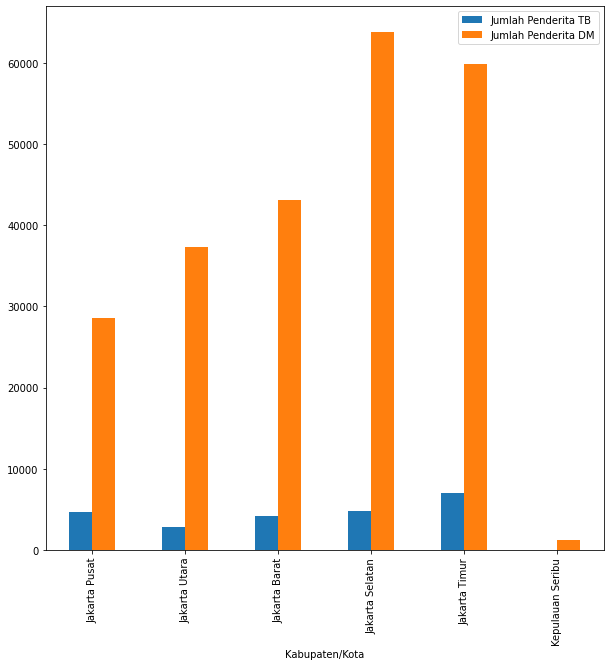

In [141]:
import pandas as pd
import matplotlib.pyplot as mp
 
# take data
datajkt = jkt_data
 
 
df = pd.DataFrame(datajkt, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(10, 10))
 
# print bar graph
mp.show()

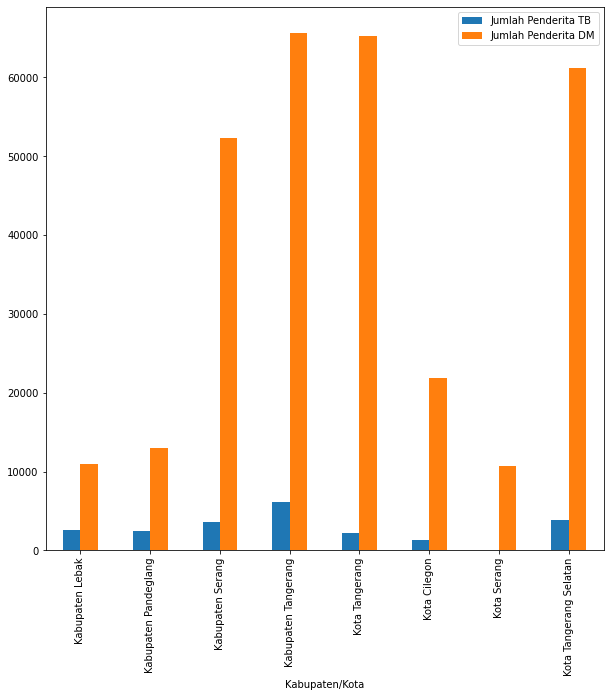

In [143]:
# take data
databanten = banten_data
 
df = pd.DataFrame(databanten, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(10, 10))
 
# print bar graph
mp.show()

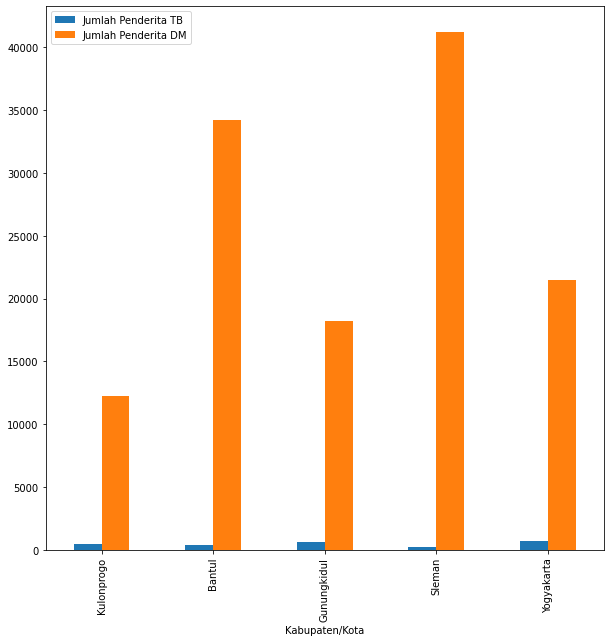

In [142]:
# take data
datadiy = diy_data
 
 
df = pd.DataFrame(datadiy, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(10, 10))
 
# print bar graph
mp.show()

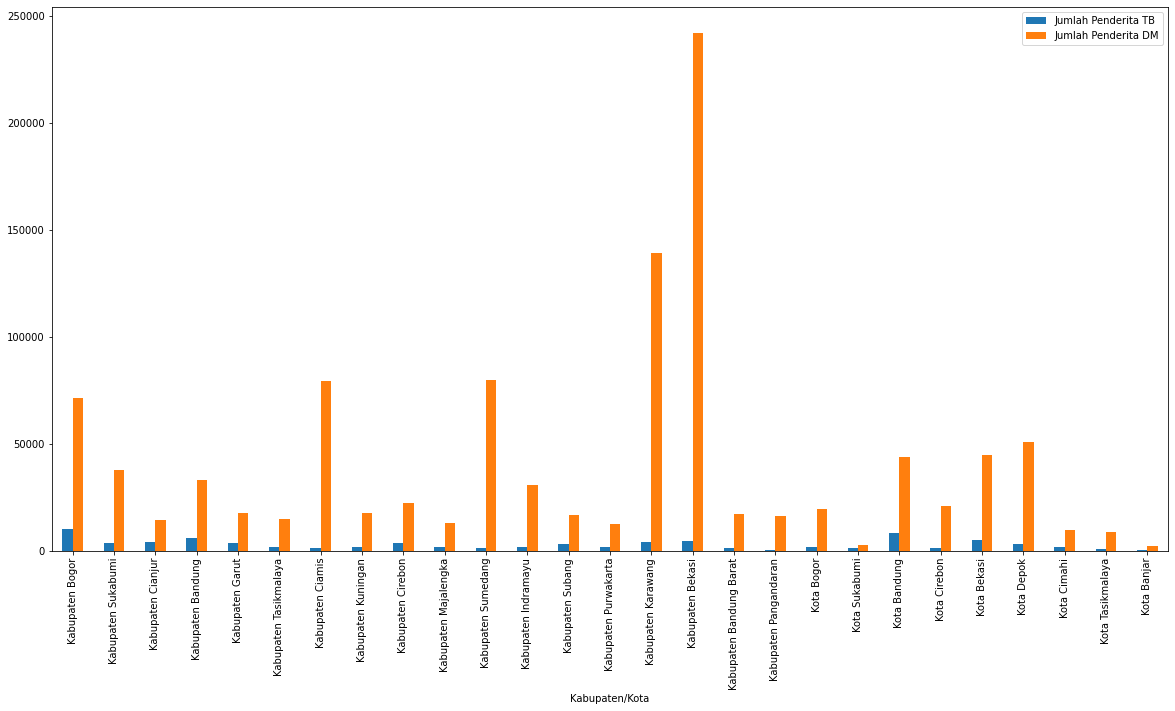

In [144]:
# take data
datajabar = jabar_data
 
 
df = pd.DataFrame(datajabar, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(20, 10))
 
# print bar graph
mp.show()

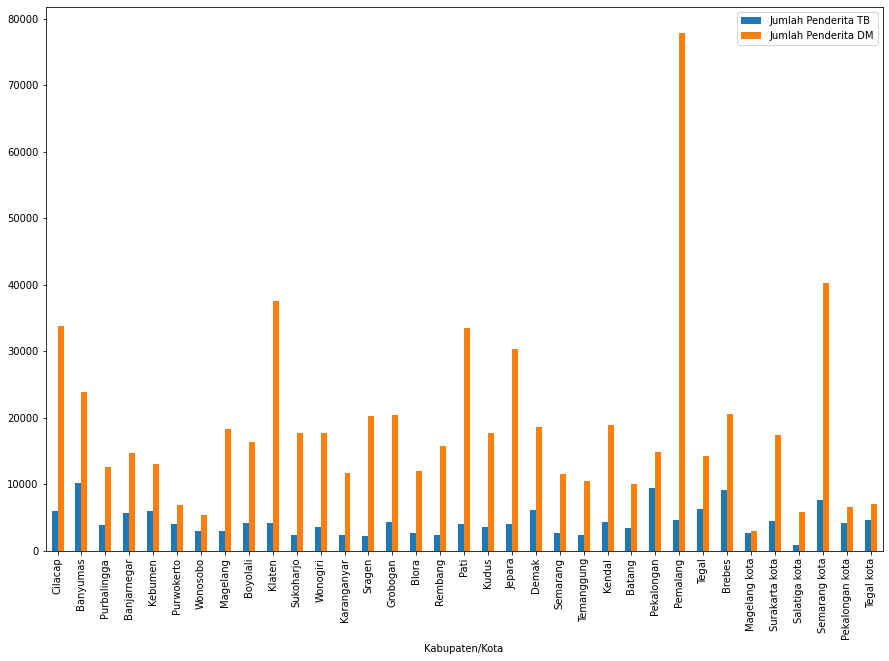

In [145]:
# take data
datajateng = jateng_data
 
 
df = pd.DataFrame(datajateng, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(15, 10))
 
# print bar graph
mp.show()

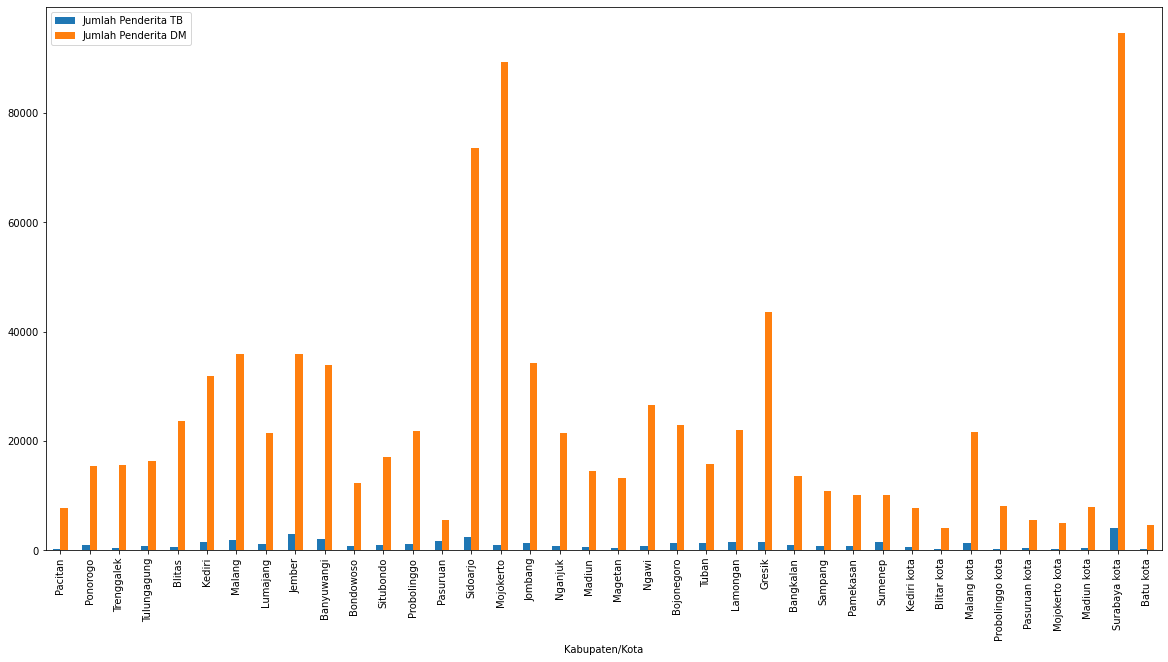

In [146]:
# take data
datajatim = jatim_data
 
 
df = pd.DataFrame(datajatim, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(20, 10))
 
# print bar graph
mp.show()

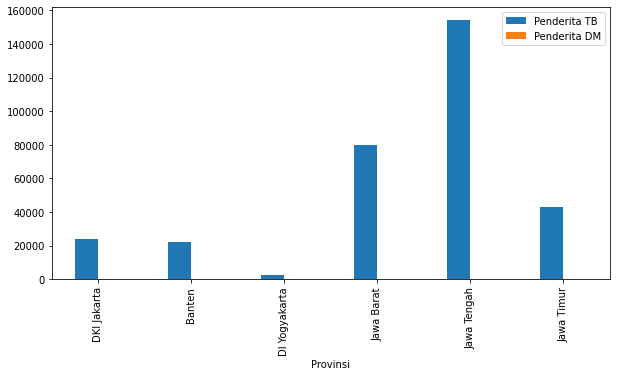

In [179]:
# take data
barjawa = datajawa
 
df = pd.DataFrame(datajawa, columns=["Provinsi", "Penderita TB", "Penderita DM"])
 
# plot the dataframe
df.plot(x="Provinsi", y=["Penderita TB", "Penderita DM"], kind="bar", figsize=(10, 5))
 
# print bar graph
mp.show()

### **SCATTER**

In [148]:
pip install tabulate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
from tabulate import tabulate

In [156]:
# JKT
sum_dm_jkt = jkt_data['Jumlah Penderita DM'].sum()
sum_tb_jkt = jkt_data['Jumlah Penderita TB'].sum()

# Banten
sum_dm_btn = banten_data['Jumlah Penderita DM'].sum()
sum_tb_btn = banten_data['Jumlah Penderita TB'].sum()

# DIY
sum_dm_diy = diy_data['Jumlah Penderita DM'].sum()
sum_tb_diy = diy_data['Jumlah Penderita TB'].sum()

# Jabar
sum_dm_jabar = jabar_data['Jumlah Penderita DM'].sum()
sum_tb_jabar = jabar_data['Jumlah Penderita TB'].sum()

# Jateng
sum_dm_jateng = jateng_data['Jumlah Penderita DM'].sum()
sum_tb_jateng = jateng_data['Jumlah Penderita TB'].sum()

# Jatim
sum_dm_jatim = jatim_data['Jumlah Penderita DM'].sum()
sum_tb_jatim = jatim_data['Jumlah Penderita TB'].sum()

sum_dm_jabar

1078857

In [177]:
datajawa1 = [ 
    ['DKI Jakarta', sum_tb_jkt, sum_dm_jkt], 
    ['Banten', sum_tb_btn, sum_dm_btn], 
    ['DI Yogyakarta', sum_tb_diy, sum_dm_diy],
    ['Jawa Barat', sum_tb_jabar, sum_dm_jabar],
    ['Jawa Tengah', sum_tb_jateng, sum_dm_jateng],
    ['Jawa Timur', sum_tb_jatim, sum_dm_jatim]]
head = ['Provinsi', 'Penderita TB', 'Penderita DM']

print(tabulate(datajawa1, headers=['Provinsi', 'Penderita TB', 'Penderita DM'], tablefmt="grid"))

+---------------+----------------+------------------+
| Provinsi      |   Penderita TB |     Penderita DM |
+===============+================+==================+
| DKI Jakarta   |          23615 | 233918           |
+---------------+----------------+------------------+
| Banten        |          21994 | 301018           |
+---------------+----------------+------------------+
| DI Yogyakarta |           2474 | 127343           |
+---------------+----------------+------------------+
| Jawa Barat    |          79840 |      1.07886e+06 |
+---------------+----------------+------------------+
| Jawa Tengah   |         154062 | 655855           |
+---------------+----------------+------------------+
| Jawa Timur    |          42922 | 875745           |
+---------------+----------------+------------------+


In [180]:
datajawa = {'Provinsi':['DKI Jakarta','Banten','DI Yogyakarta','Jawa Barat','Jawa Tengah','Jawa Timur'], 'Penderita Tuberkulosis':[sum_tb_jkt,sum_tb_btn,sum_tb_diy,sum_tb_jabar,sum_tb_jateng,sum_tb_jatim], 'Penderita Diabetes':[sum_dm_jkt,sum_dm_btn,sum_dm_diy,sum_dm_jabar,sum_dm_jateng,sum_dm_jatim]}
print(tabulate(datajawa, headers='keys'))

Provinsi         Penderita Tuberkulosis    Penderita Diabetes
-------------  ------------------------  --------------------
DKI Jakarta                       23615      233918
Banten                            21994      301018
DI Yogyakarta                      2474      127343
Jawa Barat                        79840           1.07886e+06
Jawa Tengah                      154062      655855
Jawa Timur                        42922      875745


In [ ]:
# take data
datajawa = jawa_data
 
x = [1, 2, 3, 4]
y = [4, 1, 3, 6]
plt.scatter(x, y, c='green')

x = [5, 6, 7, 8]
y = [1, 3, 5, 2]
plt.scatter(x, y, c='red')


df = pd.DataFrame(datajawa, columns=["Kabupaten/Kota", "Jumlah Penderita TB", "Jumlah Penderita DM"])
 
# plot the dataframe
df.plot(x="Kabupaten/Kota", y=["Jumlah Penderita TB", "Jumlah Penderita DM"], kind="bar", figsize=(10, 10))
 
# print bar graph
mp.show()

In [182]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

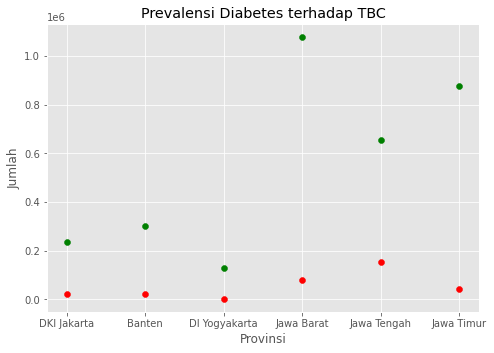

In [206]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prov = datajawa['Provinsi']
tb = [sum_tb_jkt,sum_tb_btn,sum_tb_diy,sum_tb_jabar,sum_tb_jateng,sum_tb_jatim]
dm = [sum_dm_jkt,sum_dm_btn,sum_dm_diy,sum_dm_jabar,sum_dm_jateng,sum_dm_jatim]

# hubungan tugas dengan uts
ax.scatter(prov,tb,color='red')
# hubungan tugas dengan uas
ax.scatter(prov,dm,color='green')

# set label X dan Y
ax.set_xlabel('Provinsi')
ax.set_ylabel('Jumlah')
ax.set_title('Prevalensi Diabetes terhadap TBC')

# tampilkan
plt.show()

## **STREAMLIT**

### INSTALL

In [208]:
!pip install streamlit
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 2.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=5edbf24718ba5aadd731e614bbbaa0ad713f2823df70604baf96902938015cd9
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [217]:
from pyngrok import ngrok

# [<NgrokTunnel: "http://<public_sub>.ngrok.io" -> "http://localhost:80">]
tunnels = ngrok.get_tunnels()

In [219]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
